In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.model_selection import train_test_split
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import roc_auc_score
import os
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.metrics import precision_recall_curve,fbeta_score
from sklearn.metrics import roc_curve,accuracy_score
os.chdir('C:/Users/kriti/OneDrive/Desktop/MoneyLaunderingProject/Code')

In [95]:
#Read Summarized Files	
SummarizedNormal = pd.read_csv('SummarizedData_N.csv')
SummarizedShell =  pd.read_csv('SummarizedData_S.csv')
SummarizedData = SummarizedNormal.append(SummarizedShell)

In [96]:
# creating a dict file  
Company = {'S': 1,'N': 0} 
SummarizedData.Flag = [Company[item] for item in SummarizedData.Flag] 

In [97]:
##Checking Null values
SummarizedData.isnull().sum().max()

0

In [98]:
SummarizedNormal.fillna( method ='ffill', inplace = True)
SummarizedShell.fillna( method ='ffill', inplace = True) 
SummarizedData.fillna( method ='ffill', inplace = True)

In [99]:
##Checking Null values
SummarizedData.isnull().sum().max()

0

In [100]:
##Drop Account Number
SummarizedData = SummarizedData.drop(['AccountNumber'],axis=1)

In [101]:
SummarizedData.shape

(10000, 23)

In [102]:
SummarizedData.head(2)

,Foreign,Local,TaxHaven,ClientToIncomingRatio,IncomingTransSmallAmount,IncomingTransLargeAmount,TypeAccount,IncomingCashTransaction,IncomingOnlineTransaction,AnnualExpenditure,...,AvgTransPerClient,IncomingTransPercentage,OutgoingTransPercentage,AvgIncomingAmount,AvgOutgoingAmount,AvgIncomingCount,AvgOutgoingCount,AnnualProfit,PercentageExpenditure,Flag
0,0.263943,0.708820,0.027237,0.972707,0.160480,0.839520,1,0.594978,0.086245,0.020927,...,1542,0.594034,0.405966,111332.166667,116305.583333,76.333333,52.166667,0.039002,0.110113,0
1,0.225806,0.748387,0.025806,0.962264,0.396226,0.603774,0,0.679245,0.094340,0.000971,...,155,0.341935,0.658065,4535.916667,9388.250000,4.416667,8.500000,0.002172,0.027807,0


In [103]:
SummarizedData.columns.values

array(['Foreign', 'Local', 'TaxHaven', 'ClientToIncomingRatio',
       'IncomingTransSmallAmount', 'IncomingTransLargeAmount',
       'TypeAccount', 'IncomingCashTransaction',
       'IncomingOnlineTransaction', 'AnnualExpenditure', 'AnnualRevenue',
       'LargeAmoutOutgoingTrans', 'SmallAmountOutgoingTrans',
       'AvgTransPerClient', 'IncomingTransPercentage',
       'OutgoingTransPercentage', 'AvgIncomingAmount',
       'AvgOutgoingAmount', 'AvgIncomingCount', 'AvgOutgoingCount',
       'AnnualProfit', 'PercentageExpenditure', 'Flag'], dtype=object)

In [104]:
CorrelationTartgetValue = SummarizedData[SummarizedData.columns[1:]].corr()['Flag'][:].sort_values(ascending = False)

In [105]:
CorrelationTartgetValue = CorrelationTartgetValue.iloc[1:]

In [106]:
CorrelationTartgetValue

TaxHaven                     0.293343
OutgoingTransPercentage      0.182066
TypeAccount                  0.111488
LargeAmoutOutgoingTrans      0.054410
IncomingOnlineTransaction    0.042256
AnnualExpenditure            0.037667
IncomingTransSmallAmount     0.035981
AvgOutgoingCount             0.033589
AvgOutgoingAmount            0.020904
AnnualProfit                 0.014511
AvgTransPerClient            0.009631
AnnualRevenue                0.000377
AvgIncomingAmount           -0.015163
AvgIncomingCount            -0.015552
IncomingTransLargeAmount    -0.037384
IncomingCashTransaction     -0.039937
SmallAmountOutgoingTrans    -0.054410
PercentageExpenditure       -0.129532
IncomingTransPercentage     -0.182066
Local                       -0.219816
ClientToIncomingRatio       -0.252717
Name: Flag, dtype: float64

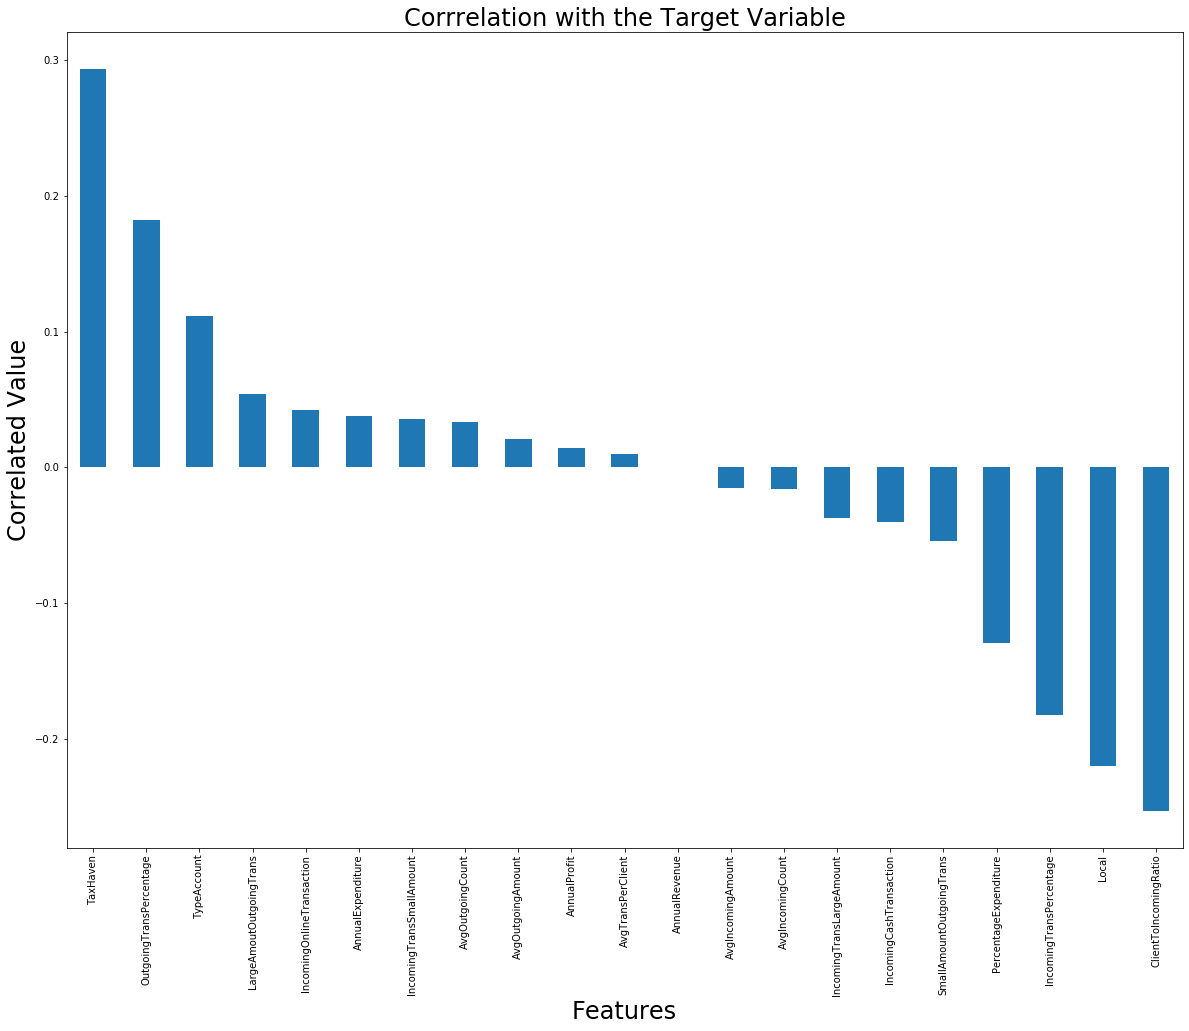

In [107]:
plt.figure(figsize=(20,15))
#CorrelationTartgetValue = CorrelationTartgetValue.drop(['Flag'])
CorrelationTartgetValue.plot(x ='Country', y='GDP_Per_Capita', kind = 'bar')
plt.title('Corrrelation with the Target Variable',fontsize = 24)
plt.xlabel('Features',fontsize = 24)
plt.ylabel('Correlated Value',fontsize = 24)
plt.savefig('CorrelationWithFlagVariable.png')

In [108]:
X = SummarizedData.iloc[:, SummarizedData.columns!= 'Flag']
Y = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [109]:
m = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
m.fit(X, Y.values.ravel())
fi = pd.DataFrame({'feature': X.columns, 'importance': m.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

,index,feature,importance
0,2,TaxHaven,0.179793
1,3,ClientToIncomingRatio,0.130925
2,1,Local,0.093988
3,21,PercentageExpenditure,0.070406
4,17,AvgOutgoingAmount,0.060406
5,14,IncomingTransPercentage,0.057265
6,4,IncomingTransSmallAmount,0.048173
7,9,AnnualExpenditure,0.045384
8,19,AvgOutgoingCount,0.040291
9,15,OutgoingTransPercentage,0.038981


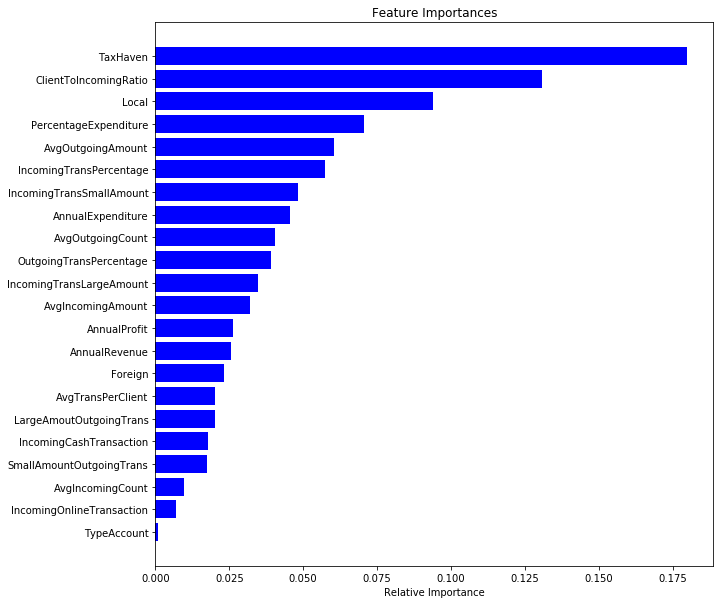

In [110]:
features = X.columns.values
importances = m.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [111]:
from sklearn import preprocessing
#AvgIncomingAmount
x = SummarizedData[['AvgIncomingAmount']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
SummarizedData[['AvgIncomingAmount']] = df_normalized
#AvgTransPerClient
y = SummarizedData[['AvgTransPerClient']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
y_scaled = min_max_scaler.fit_transform(y)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(y_scaled)
SummarizedData[['AvgTransPerClient']] = df_normalized
#AvgOutgoingAmount
z = SummarizedData[['AvgOutgoingAmount']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
z_scaled = min_max_scaler.fit_transform(z)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(z_scaled)
SummarizedData[['AvgOutgoingAmount']] = df_normalized
#AvgIncomingCount
k = SummarizedData[['AvgIncomingCount']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
k_scaled = min_max_scaler.fit_transform(k)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(k_scaled)
SummarizedData[['AvgIncomingCount']] = df_normalized
#AvgOutgoingCount
m = SummarizedData[['AvgOutgoingCount']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
m_scaled = min_max_scaler.fit_transform(m)
# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(m_scaled)
SummarizedData[['AvgOutgoingCount']] = df_normalized

In [112]:
SummarizedData.head(2)

,Foreign,Local,TaxHaven,ClientToIncomingRatio,IncomingTransSmallAmount,IncomingTransLargeAmount,TypeAccount,IncomingCashTransaction,IncomingOnlineTransaction,AnnualExpenditure,...,AvgTransPerClient,IncomingTransPercentage,OutgoingTransPercentage,AvgIncomingAmount,AvgOutgoingAmount,AvgIncomingCount,AvgOutgoingCount,AnnualProfit,PercentageExpenditure,Flag
0,0.263943,0.708820,0.027237,0.972707,0.160480,0.839520,1,0.594978,0.086245,0.020927,...,0.023777,0.594034,0.405966,0.003771,0.000800,0.035443,0.014673,0.039002,0.110113,0
1,0.225806,0.748387,0.025806,0.962264,0.396226,0.603774,0,0.679245,0.094340,0.000971,...,0.001220,0.341935,0.658065,0.000121,0.000022,0.001607,0.000769,0.002172,0.027807,0


# Testing using Subset of Variables - Single Variable

In [113]:
X1 = SummarizedData.iloc[:, SummarizedData.columns == 'TaxHaven']
Y1 = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [114]:
TrainX1,TestX1, TrainY1,TestY1 = train_test_split(X1,Y1,test_size =0.3, random_state = 0)

In [115]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [4,5,6],"learning_rate":[0.5,1]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(TrainX1,TrainY1)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX1)

TrainPred = best_clf.predict(TrainX1)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 0.9536
Final F-score on the Training data: 0.2494
precision_score 0.6813186813186813
recall_score 0.17318435754189945
[[  62  296]
 [  29 6613]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9450
Final F-score on the testing data: 0.0986
precision_score 0.23255813953488372
recall_score 0.07042253521126761
[[  10  132]
 [  33 2825]]
Auc Score is :  0.5294379995860397


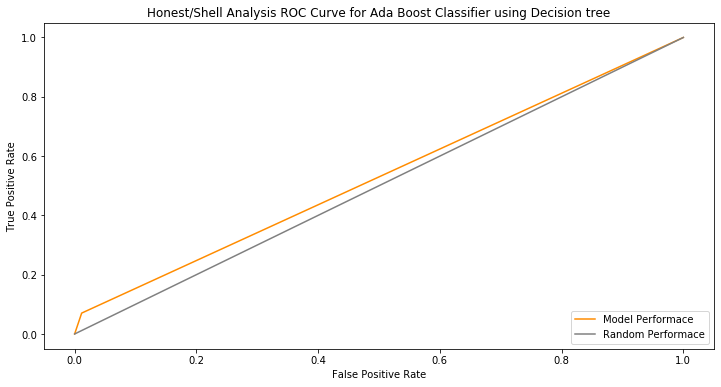

In [116]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY1,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY1,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY1,TrainPred))
print('recall_score',recall_score(TrainY1,TrainPred))
cm1 = confusion_matrix(TrainY1,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY1,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY1,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY1,best_predictions))
print('recall_score',recall_score(TestY1,best_predictions))
cm = confusion_matrix(TestY1,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY1,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY1,best_predictions))

# Testing using Subset of Variables - 2 Variable

In [117]:
X2 = SummarizedData[['TaxHaven','ClientToIncomingRatio']]
Y2 = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [118]:
TrainX2,TestX2, TrainY2,TestY2 = train_test_split(X2,Y2,test_size =0.3, random_state = 0)

In [119]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [4,5,6],"learning_rate":[0.5,1]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(TrainX2,TrainY2)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX2)

TrainPred = best_clf.predict(TrainX2)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
             

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 0.9964
Final F-score on the Training data: 0.9648
precision_score 0.9663865546218487
recall_score 0.9636871508379888
[[ 345   13]
 [  12 6630]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9457
Final F-score on the testing data: 0.3851
precision_score 0.416
recall_score 0.36619718309859156
[[  52   90]
 [  73 2785]]
Auc Score is :  0.6703274228998906


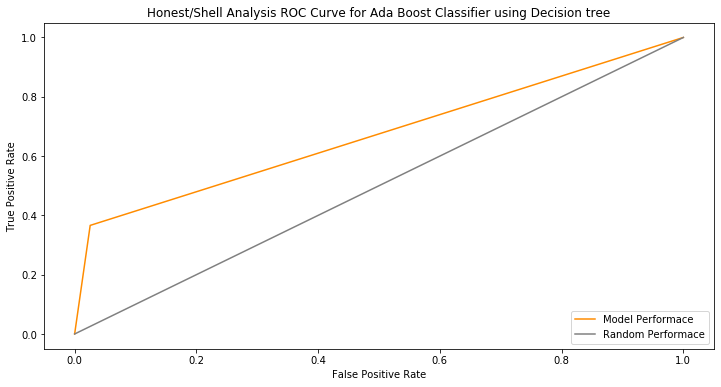

In [120]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY2,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY2,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY2,TrainPred))
print('recall_score',recall_score(TrainY2,TrainPred))
cm1 = confusion_matrix(TrainY2,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY2,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY2,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY2,best_predictions))
print('recall_score',recall_score(TestY2,best_predictions))
cm = confusion_matrix(TestY2,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY2,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY2,best_predictions))

# Testing using Subset of Variables - 3 Variable

In [121]:
X3 = SummarizedData[['TaxHaven','ClientToIncomingRatio','Local']]
Y3 = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [122]:
TrainX3,TestX3, TrainY3,TestY3 = train_test_split(X3,Y3,test_size =0.3, random_state = 0)

In [123]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [4,5,6],"learning_rate":[0.5,1]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(TrainX3,TrainY3)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX3)

TrainPred = best_clf.predict(TrainX3)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
             

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 1.0000
Final F-score on the Training data: 1.0000
precision_score 1.0
recall_score 1.0
[[ 358    0]
 [   0 6642]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9603
Final F-score on the testing data: 0.5398
precision_score 0.5950413223140496
recall_score 0.5070422535211268
[[  72   70]
 [  49 2809]]
Auc Score is :  0.7449486984890449


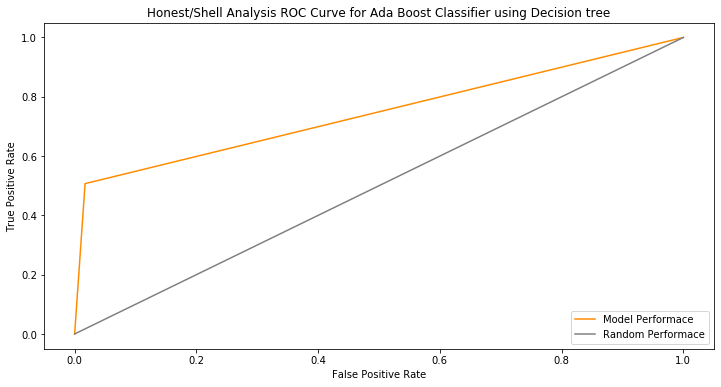

In [124]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY3,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY3,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY3,TrainPred))
print('recall_score',recall_score(TrainY3,TrainPred))
cm1 = confusion_matrix(TrainY3,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY3,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY3,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY3,best_predictions))
print('recall_score',recall_score(TestY3,best_predictions))
cm = confusion_matrix(TestY3,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY3,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY3,best_predictions))

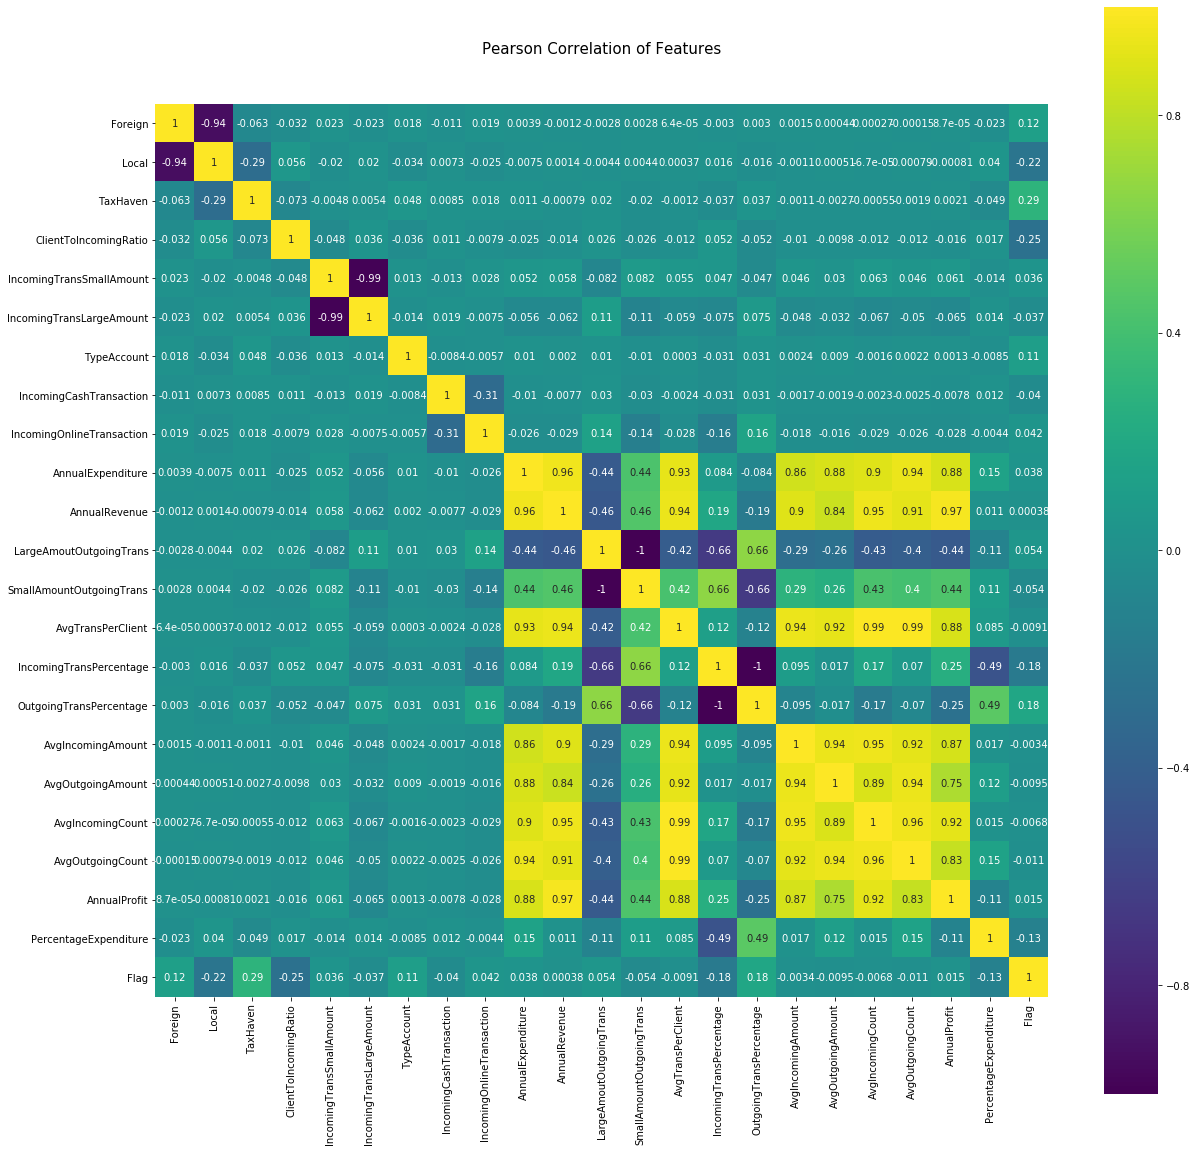

In [125]:
##Pearson Correlation
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(SummarizedData.astype(float).corr(),linewidths=0,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('CorrelationMatrix.png')

# Testing using Subset of Variables - 4 Variable

In [126]:
X4 = SummarizedData[['TaxHaven','ClientToIncomingRatio','Local','IncomingTransSmallAmount']]
Y4 = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']


In [127]:
TrainX4,TestX4, TrainY4,TestY4 = train_test_split(X4,Y4,test_size =0.3, random_state = 0)

In [128]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [4,5,6],"learning_rate":[0.5,1]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(TrainX4,TrainY4)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX4)

TrainPred = best_clf.predict(TrainX4)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\valid

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 1.0000
Final F-score on the Training data: 1.0000
precision_score 1.0
recall_score 1.0
[[ 358    0]
 [   0 6642]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9713
Final F-score on the testing data: 0.6583
precision_score 0.7372881355932204
recall_score 0.6126760563380281
[[  87   55]
 [  31 2827]]
Auc Score is :  0.8009146551809104


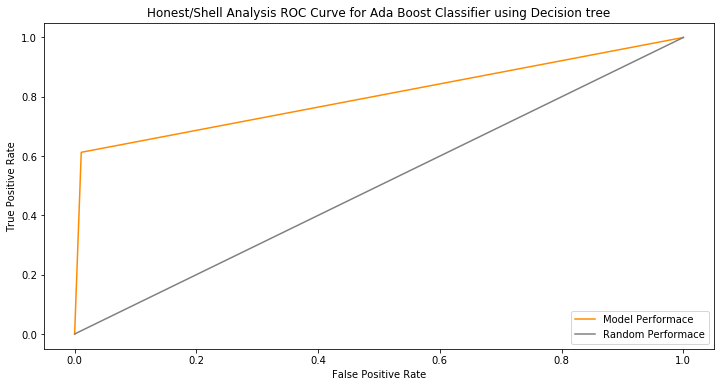

In [129]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY4,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY4,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY4,TrainPred))
print('recall_score',recall_score(TrainY4,TrainPred))
cm1 = confusion_matrix(TrainY4,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY4,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY4,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY4,best_predictions))
print('recall_score',recall_score(TestY4,best_predictions))
cm = confusion_matrix(TestY4,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY4,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY4,best_predictions))

# Applying PCA 

In [130]:
X5 = SummarizedData.iloc[:, SummarizedData.columns != 'Flag']
Y5 = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X5 =scaler.fit_transform(X5)

In [132]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X5)

array([[-8.81249127e-01, -1.23129324e+00, -2.57455677e+00, ...,
         3.07780440e-14, -9.09329990e-16, -5.94016943e-16],
       [-2.80508699e+00,  2.90301325e+00, -2.83861656e+00, ...,
        -1.47983334e-14,  9.99709134e-16,  1.53000331e-16],
       [-3.05415116e+00,  4.71433271e+00,  3.20727980e+00, ...,
        -9.63661436e-16, -1.55559038e-15,  1.79778483e-15],
       ...,
       [-6.41363866e-01,  1.74620682e-01,  1.00636537e+00, ...,
        -2.77717081e-15,  1.12363606e-15,  3.99606579e-17],
       [-1.15080602e+00, -8.66746140e-01,  2.01828418e+00, ...,
        -1.61313877e-15, -2.03877061e-17,  8.67445603e-17],
       [-3.33988117e+00,  5.11526740e+00, -2.49648190e-02, ...,
        -1.40598254e-15, -1.16754714e-15, -7.36614376e-16]])

In [133]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.61336525e-01, 1.40735835e-01, 9.19608907e-02, 8.74654329e-02,
       6.17694812e-02, 5.77986758e-02, 5.03543619e-02, 4.42240797e-02,
       4.28774587e-02, 3.00378401e-02, 1.40165599e-02, 6.83220466e-03,
       5.85002152e-03, 3.57500754e-03, 5.83661405e-04, 4.63216769e-04,
       9.19348756e-05, 2.68117404e-05, 4.86613181e-10, 1.70108067e-31,
       1.58683782e-32, 9.25770547e-33])

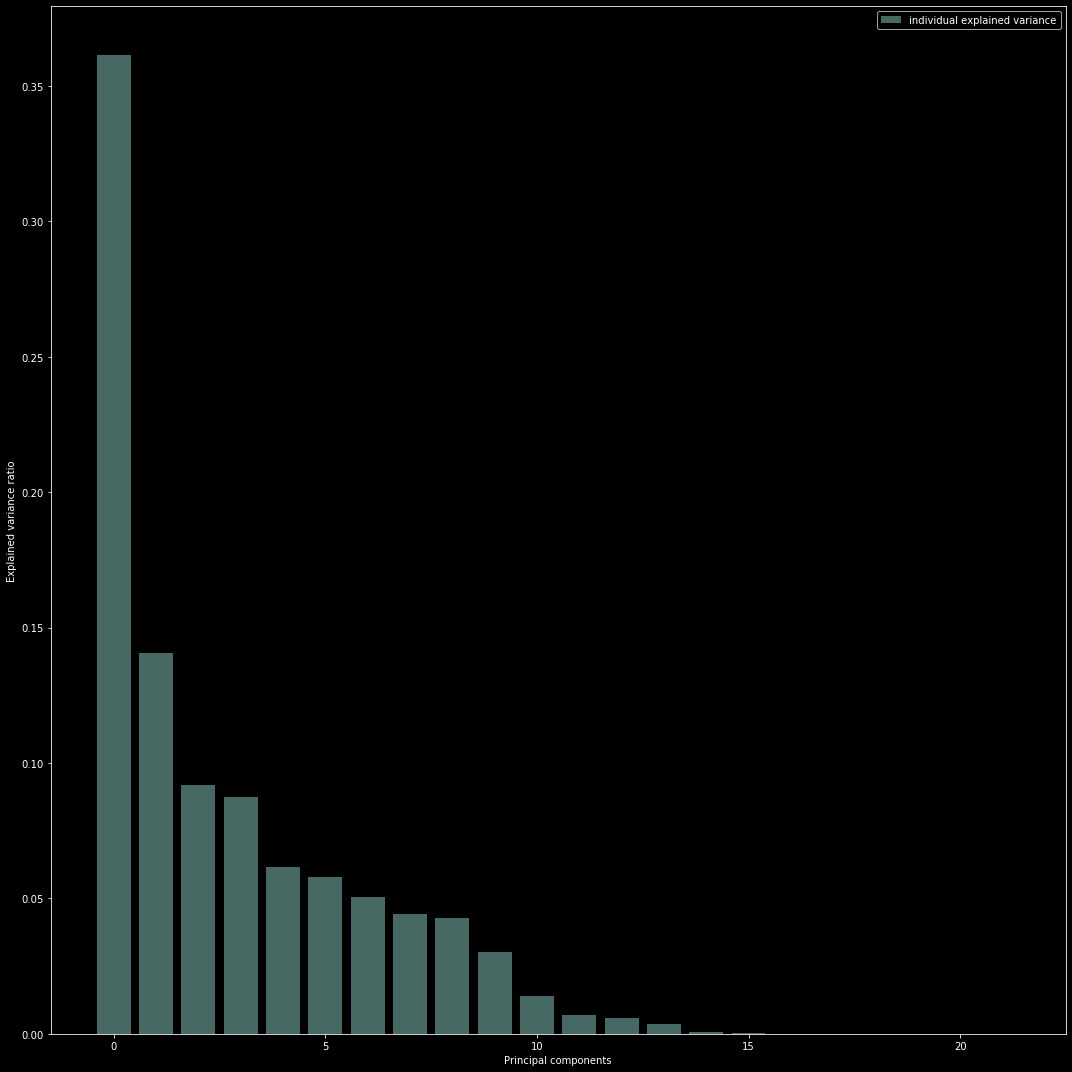

In [134]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,15))

    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

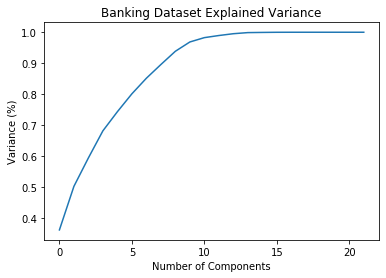

In [135]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Banking Dataset Explained Variance')
plt.show()

# Testing on Subset of Variables

In [136]:
X6 = SummarizedData[['TaxHaven','ClientToIncomingRatio','Foreign','IncomingTransSmallAmount','TypeAccount','IncomingCashTransaction',
       'IncomingOnlineTransaction','AnnualExpenditure','PercentageExpenditure','OutgoingTransPercentage','AvgOutgoingAmount']]
Y6 = SummarizedData.iloc[:, SummarizedData.columns == 'Flag']

In [137]:
TrainX6,TestX6, TrainY6,TestY6 = train_test_split(X6,Y6,test_size =0.3, random_state = 0)

In [138]:
param_grid = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [4],"learning_rate":[1]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(TrainX6,TrainY6)

best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX6)

TrainPred = best_clf.predict(TrainX6)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
             

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 1.0000
Final F-score on the Training data: 1.0000
precision_score 1.0
recall_score 1.0
[[ 358    0]
 [   0 6642]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9847
Final F-score on the testing data: 0.8044
precision_score 0.9210526315789473
recall_score 0.7394366197183099
[[ 105   37]
 [   9 2849]]
Auc Score is :  0.8681437822174475


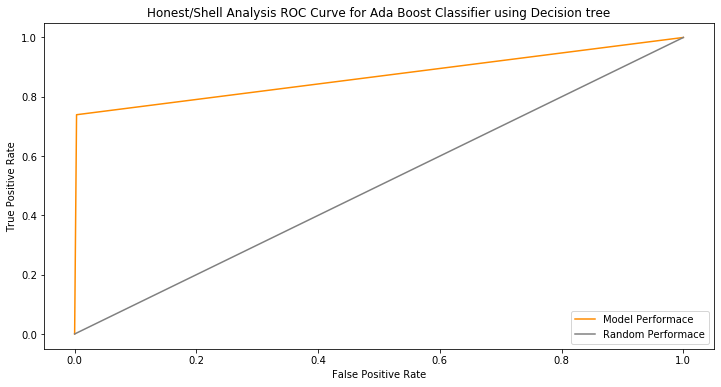

In [139]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY6,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY6,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY6,TrainPred))
print('recall_score',recall_score(TrainY6,TrainPred))
cm1 = confusion_matrix(TrainY6,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY6,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY6,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY6,best_predictions))
print('recall_score',recall_score(TestY6,best_predictions))
cm = confusion_matrix(TestY6,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY6,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY6,best_predictions))

# Experiment Results

# Decision Tree

In [140]:
from sklearn import tree
import graphviz

In [141]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',min_samples_split = 2,max_depth = 10,min_samples_leaf = 1,min_weight_fraction_leaf = 0)

#parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)},{'min_samples_split': (0.1,0.2,0.3,0.4,0.5)},{'min_samples_leaf': (1,2,3,4,5,6,7)},{'min_weight_fraction_leaf': (0.0,0.1,0.2)}
#scorer = make_scorer(fbeta_score,beta=1.5)

#grid_obj = GridSearchCV(clf, param_grid = parameters, scoring=scorer)
grid_fit = best_clf.fit(TrainX6,TrainY6)

#best_clf = grid_fit.best_estimator_
#print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX6)

TrainPred = best_clf.predict(TrainX6)

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 0.9969
Final F-score on the Training data: 0.9704
precision_score 0.9640883977900553
recall_score 0.9748603351955307
[[ 349    9]
 [  13 6629]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9807
Final F-score on the testing data: 0.7933
precision_score 0.8
recall_score 0.7887323943661971
[[ 112   30]
 [  28 2830]]
Auc Score is :  0.8894676667422308


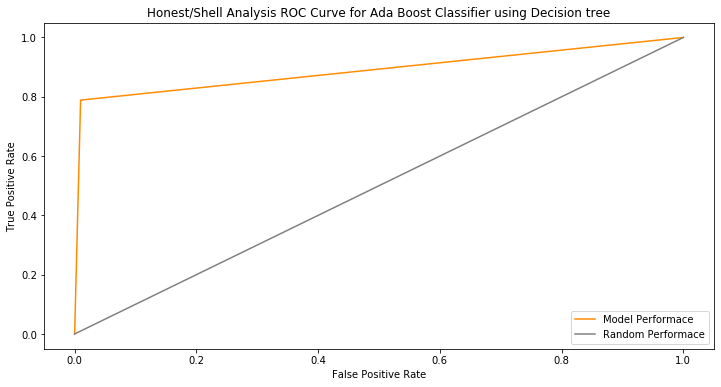

In [142]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY6,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY6,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY6,TrainPred))
print('recall_score',recall_score(TrainY6,TrainPred))
cm1 = confusion_matrix(TrainY6,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY6,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY6,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY6,best_predictions))
print('recall_score',recall_score(TestY6,best_predictions))
cm = confusion_matrix(TestY6,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY6,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY6,best_predictions))

# Random Forest Classifier

In [143]:
param_grid = { 
    'n_estimators': [5],
    'max_depth' : [5],
    'criterion' :['entropy']
}
clf=RandomForestClassifier()

In [144]:
from sklearn.metrics import fbeta_score, make_scorer
scorer = make_scorer(fbeta_score,beta=1.5)
grid_obj = GridSearchCV(clf, param_grid = param_grid, scoring=scorer,cv = 5)
grid_fit = grid_obj.fit(TrainX6,TrainY6)
best_clf = grid_fit.best_estimator_
print("Best Esimator",grid_fit.best_estimator_)
best_predictions = best_clf.predict(TestX6)
TrainPred = best_clf.predict(TrainX6)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kriti\appdata\local\programs\pytho

Best Esimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 0.9784
Final F-score on the Training data: 0.7005
precision_score 0.9952153110047847
recall_score 0.5810055865921788
[[ 208  150]
 [   1 6641]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9787
Final F-score on the testing data: 0.6814
precision_score 0.975609756097561
recall_score 0.5633802816901409
[[  80   62]
 [   2 2856]]
Auc Score is :  0.78134024581358


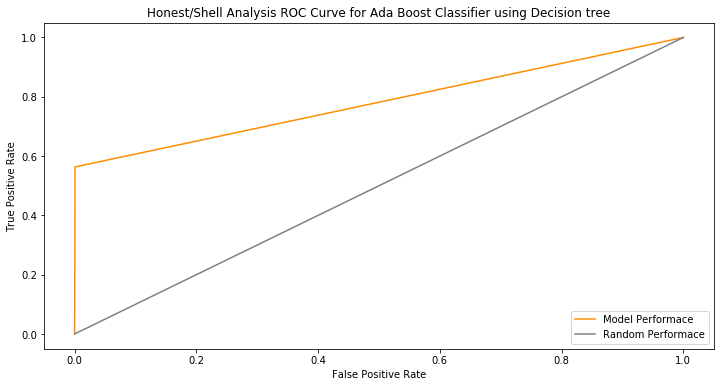

In [145]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY6,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY6,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY6,TrainPred))
print('recall_score',recall_score(TrainY6,TrainPred))
cm1 = confusion_matrix(TrainY6,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY6,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY6,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY6,best_predictions))
print('recall_score',recall_score(TestY6,best_predictions))
cm = confusion_matrix(TestY6,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY6,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY6,best_predictions))

# xgboost Classifier

In [146]:
import xgboost as xgb
model2 = xgb.XGBClassifier(learning_rate=1,
                           loss='exponential', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10
                           )
train_model1 = model2.fit(TrainX6,TrainY6)
best_predictions = train_model1.predict(TestX6)
TrainPred = train_model1.predict(TrainX6)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 1.0000
Final F-score on the Training data: 1.0000
precision_score 1.0
recall_score 1.0
[[ 358    0]
 [   0 6642]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9947
Final F-score on the testing data: 0.9320
precision_score 0.9921875
recall_score 0.8943661971830986
[[ 127   15]
 [   1 2857]]
Auc Score is :  0.9470081510758039


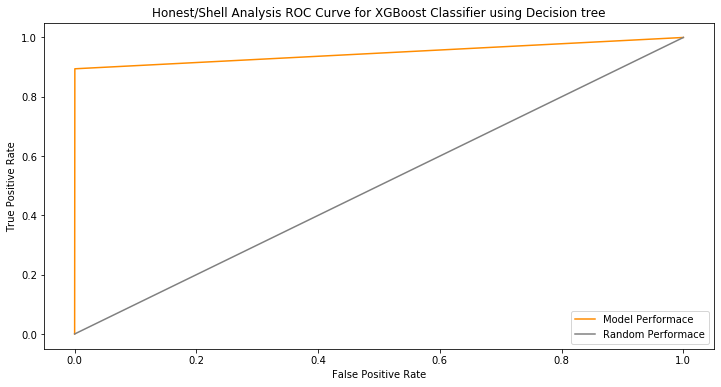

In [147]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY6,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY6,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY6,TrainPred))
print('recall_score',recall_score(TrainY6,TrainPred))
cm1 = confusion_matrix(TrainY6,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY6,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY6,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY6,best_predictions))
print('recall_score',recall_score(TestY6,best_predictions))
cm = confusion_matrix(TestY6,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY6,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for XGBoost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY6,best_predictions))

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


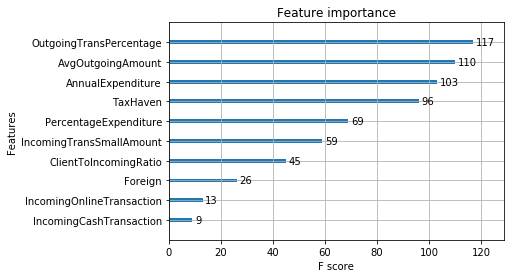

In [148]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb_model.fit(TrainX6, TrainY6, early_stopping_rounds=10,eval_set=[(TestX6,TestY6)], verbose=False)

xgb.plot_importance(xgb_model)

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
# xgb.plot_tree(xgb_model, num_trees=xgb_model.best_iteration)

# converts the target tree to a graphviz instance
#xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

# Gradient Boosting Classifier

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
gb_clf = GradientBoostingClassifier(n_estimators=4, learning_rate=1,
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None)
gb_clf.fit(TrainX6,TrainY6)


c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_gb.py:1342: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=4,
                           n_iter_no_change=None, presort=False,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [151]:
best_predictions = gb_clf.predict(TestX6)
TrainPred = best_clf.predict(TrainX6)

---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 0.9784
Final F-score on the Training data: 0.7005
precision_score 0.9952153110047847
recall_score 0.5810055865921788
[[ 208  150]
 [   1 6641]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9747
Final F-score on the testing data: 0.7590
precision_score 0.7037037037037037
recall_score 0.8028169014084507
[[ 114   28]
 [  48 2810]]
Auc Score is :  0.8930109699484521


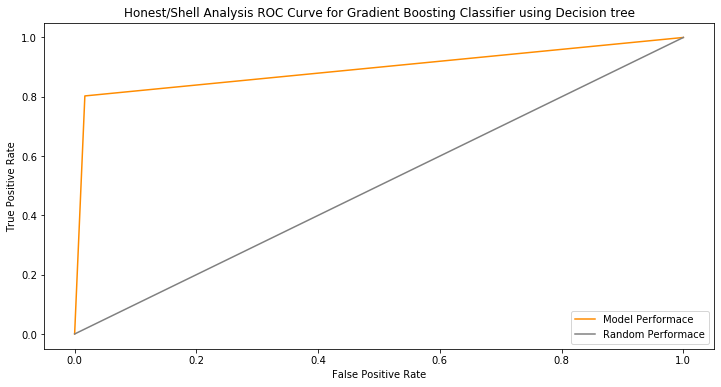

In [152]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY6,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY6,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY6,TrainPred))
print('recall_score',recall_score(TrainY6,TrainPred))
cm1 = confusion_matrix(TrainY6,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY6,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY6,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY6,best_predictions))
print('recall_score',recall_score(TestY6,best_predictions))
cm = confusion_matrix(TestY6,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY6,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Gradient Boosting Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY6,best_predictions))

# AdaBoost

In [153]:
param_grid = {"base_estimator__criterion" : ["entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [4],"learning_rate":[1]
             }
DTC = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

grid_fit = grid_search_ABC.fit(TrainX6,TrainY6)

best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(TestX6)

TrainPred = best_clf.predict(TrainX6)
print("Best Esimator",grid_fit.best_estimator_)

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_class

Best Esimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=3,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
             

c:\users\kriti\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


---------------------------------Accuracy for training Data-------------------------------------------------
Final accuracy score on the Training data: 1.0000
Final F-score on the Training data: 1.0000
precision_score 1.0
recall_score 1.0
[[ 358    0]
 [   0 6642]]
--------------------------------Accuracy for Testing Data----------------------------------------------------
Final accuracy score on the testing data: 0.9917
Final F-score on the testing data: 0.8980
precision_score 0.9606299212598425
recall_score 0.8591549295774648
[[ 122   20]
 [   5 2853]]
Auc Score is :  0.928702727210006


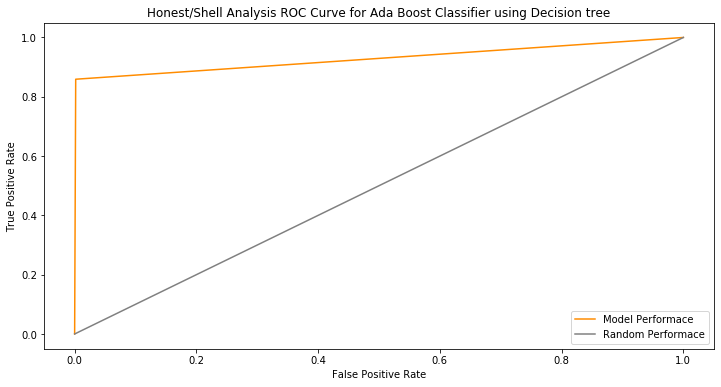

In [154]:
print("---------------------------------Accuracy for training Data-------------------------------------------------")
print ("Final accuracy score on the Training data: {:.4f}".format(accuracy_score(TrainY6,TrainPred)))
print ("Final F-score on the Training data: {:.4f}".format(fbeta_score(TrainY6,TrainPred,beta = 1.2)))
print('precision_score',precision_score(TrainY6,TrainPred))
print('recall_score',recall_score(TrainY6,TrainPred))
cm1 = confusion_matrix(TrainY6,TrainPred,labels = [1,0])
print(cm1)
print("--------------------------------Accuracy for Testing Data----------------------------------------------------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(TestY6,best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(TestY6,best_predictions,beta = 1.2)))
print('precision_score',precision_score(TestY6,best_predictions))
print('recall_score',recall_score(TestY6,best_predictions))
cm = confusion_matrix(TestY6,best_predictions,labels = [1,0])
print(cm)
fpr, tpr, thresholds = roc_curve(TestY6,best_predictions)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Honest/Shell Analysis ROC Curve for Ada Boost Classifier using Decision tree')
plt.legend(loc="lower right")
print('Auc Score is : ', roc_auc_score(TestY6,best_predictions))